https://www.kaggle.com/code/shivamb/semi-supervised-classification-using-autoencoders/notebook

In [4]:
import pandas as pd
import random
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model, Sequential

2023-03-07 18:40:31.915972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Read csv files

In [6]:
X_train = pd.read_csv('Data/X_train.csv')
X_test = pd.read_csv('Data/X_test.csv')
Y_train = pd.read_csv('Data/Y_train.csv')
Y_test = pd.read_csv('Data/Y_test.csv')

In [7]:
X_train.head()

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked
0,3262,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
1,3267,2.0,0,0,99.75,16.0,0,1,0,0,0,0,0,0,0,0
2,1407,77.0,0,0,100.85,29.5,0,1,1,0,0,1,0,0,0,0
3,1385,45.0,0,0,89.05,27.8,0,1,1,0,0,1,0,1,1,0
4,3600,27.0,0,0,82.05,21.0,0,1,0,0,0,1,0,1,0,0


In [8]:
X_train.drop(['index'], axis = 1, inplace=True)
X_test.drop(['index'], axis = 1, inplace=True)
Y_train.drop(['index'], axis = 1, inplace=True)
Y_test.drop(['index'], axis = 1, inplace=True)

In [9]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked
0,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
1,2.0,0,0,99.75,16.0,0,1,0,0,0,0,0,0,0,0
2,77.0,0,0,100.85,29.5,0,1,1,0,0,1,0,0,0,0
3,45.0,0,0,89.05,27.8,0,1,1,0,0,1,0,1,1,0
4,27.0,0,0,82.05,21.0,0,1,0,0,0,1,0,1,0,0


In [10]:
Y_train.head()

,stroke
0,0
1,0
2,0
3,0
4,0


In [11]:
sum(X_train['stroke']==1)

194

## Condider only 500 rows of healthy cases

Combine the X_train and Y_train together before sampling.

In [12]:
merged_df = pd.merge(X_train,Y_train)

In [13]:
merged_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked
0,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
1,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
2,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
3,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
4,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0


In [27]:
random.seed(10)
health = merged_df[merged_df['stroke'] == 0].sample(500)
stroke = merged_df[merged_df['stroke'] == 1]

df = health.append(stroke).sample(frac=1).reset_index(drop=True)
X = df.drop(['stroke'], axis = 1).values
Y = df["stroke"].values

/var/folders/0s/xfpwvv6x0fg3pkqm99zxr6z40000gq/T/ipykernel_46039/1891580377.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = health.append(stroke).sample(frac=1).reset_index(drop=True)


In [51]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Health')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Stroke')

    plt.legend(loc='best')
    plt.savefig(name)
    plt.show()

#function for plotting tsne representation

/Users/xin/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/xin/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


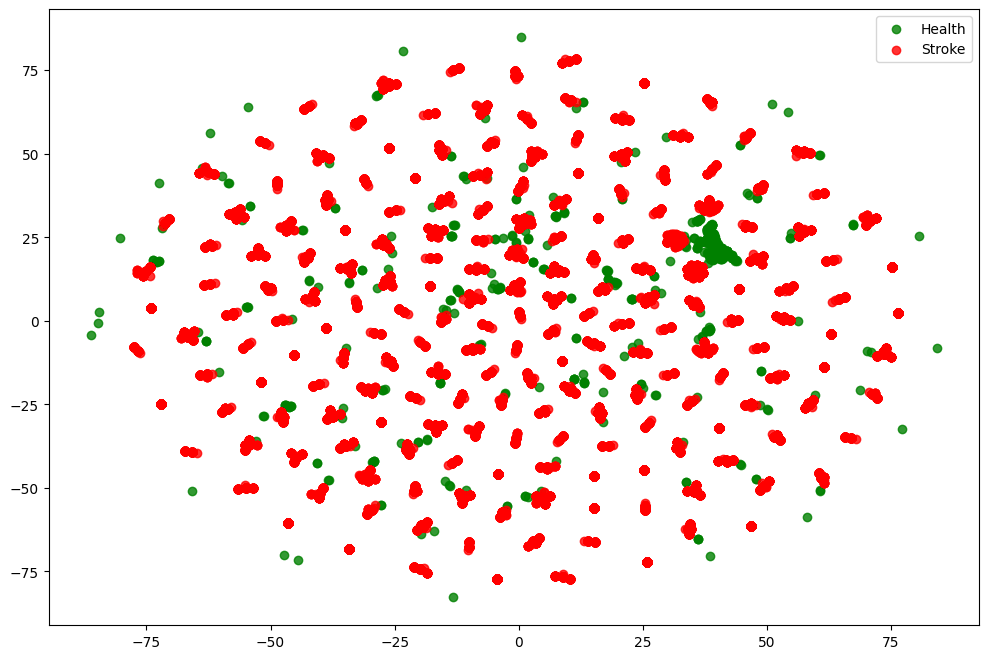

In [53]:
tsne_plot(X, Y, "original.png")

In [ ]:
input_layer = Input(shape=(X.shape[1],))

encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

output_layer = Dense(X.shape[1], activation='relu')(decoded)